In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Configuración visual
sns.set(style="whitegrid")

In [41]:
df_raw = pd.read_csv("data/asia.csv", sep=";", encoding='latin-1')

In [42]:
df_raw.head()

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
0,2/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,54,"71,8125",No da entrada porque no hay cambio de estructu...,NaN,1.0
1,3/1/2025,NQ1!,Perdida,"1,85/1",1m,03:20,54,"71,8125",Dio entrada con cambio de estructura en 1 minu...,Llevar registro de operativa para tener una es...,2.0
2,3/1/2025,EURUSD,Ganada,3/1,1m,00:23,"0,00082","0,001252","Da entrada al romper rango y meterse, como rom...",Estudiar este caso en el trading plan para aum...,3.0
3,6/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,"41,5","65,75","No llega a meterse nuevamente en el rango, dur...",NaN,4.0
4,6/1/2025,EURUSD,No dio entrada,NaN,5m,NaN,"0,00171","0,001192","No llega a meterse nuevamente en el rango, dur...",NaN,5.0


In [43]:
df_raw.tail()

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
df_raw

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
0,2/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,54,"71,8125",No da entrada porque no hay cambio de estructu...,NaN,1.0
1,3/1/2025,NQ1!,Perdida,"1,85/1",1m,03:20,54,"71,8125",Dio entrada con cambio de estructura en 1 minu...,Llevar registro de operativa para tener una es...,2.0
2,3/1/2025,EURUSD,Ganada,3/1,1m,00:23,"0,00082","0,001252","Da entrada al romper rango y meterse, como rom...",Estudiar este caso en el trading plan para aum...,3.0
3,6/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,"41,5","65,75","No llega a meterse nuevamente en el rango, dur...",NaN,4.0
4,6/1/2025,EURUSD,No dio entrada,NaN,5m,NaN,"0,00171","0,001192","No llega a meterse nuevamente en el rango, dur...",NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...
91,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
# Eliminar filas donde TODAS las columnas están vacías (NaN)
df_raw.dropna(how='all', inplace=True)

In [46]:
print(df_raw.shape)

(51, 11)


In [47]:
df_raw

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
0,2/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,54,"71,8125",No da entrada porque no hay cambio de estructu...,NaN,1.0
1,3/1/2025,NQ1!,Perdida,"1,85/1",1m,03:20,54,"71,8125",Dio entrada con cambio de estructura en 1 minu...,Llevar registro de operativa para tener una es...,2.0
2,3/1/2025,EURUSD,Ganada,3/1,1m,00:23,"0,00082","0,001252","Da entrada al romper rango y meterse, como rom...",Estudiar este caso en el trading plan para aum...,3.0
3,6/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,"41,5","65,75","No llega a meterse nuevamente en el rango, dur...",NaN,4.0
4,6/1/2025,EURUSD,No dio entrada,NaN,5m,NaN,"0,00171","0,001192","No llega a meterse nuevamente en el rango, dur...",NaN,5.0
5,7/1/2025,NQ1!,Ganada,"1,66/1",5m,02:05,"69,75",72,"Se forma un rango a la baja, el precio rompe c...",NaN,6.0
6,7/1/2025,EURUSD,No dio entrada,NaN,5m,NaN,"0,00181","0,001322","No llega a meterse nuevamente en el rango, dur...",NaN,7.0
7,8/1/2025,NQ1!,Ganada,"1,66/1",1m,02:51,"52,5","65,1","Se forma un rango, el precio rompe con fuerza ...",En este caso el precio llega al techo del rang...,8.0
8,8/1/2025,EURUSD,Ganada,2 /1,5m,01:20,"0,00095","0,001312","Se forma rango, el precio tiene un pequeño rom...",NaN,9.0
9,9/1/2025,NQ1!,Perdida,"1,7 /1",5m,03:40,"120,25","67,65","Se sigue entrada PO3, el precio se va a SL.","Analizar la cantidad de puntos, en esta operac...",10.0


In [48]:
df = df_raw.copy()  # Duplicamos el original

In [49]:
df

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
0,2/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,54,"71,8125",No da entrada porque no hay cambio de estructu...,NaN,1.0
1,3/1/2025,NQ1!,Perdida,"1,85/1",1m,03:20,54,"71,8125",Dio entrada con cambio de estructura en 1 minu...,Llevar registro de operativa para tener una es...,2.0
2,3/1/2025,EURUSD,Ganada,3/1,1m,00:23,"0,00082","0,001252","Da entrada al romper rango y meterse, como rom...",Estudiar este caso en el trading plan para aum...,3.0
3,6/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,"41,5","65,75","No llega a meterse nuevamente en el rango, dur...",NaN,4.0
4,6/1/2025,EURUSD,No dio entrada,NaN,5m,NaN,"0,00171","0,001192","No llega a meterse nuevamente en el rango, dur...",NaN,5.0
5,7/1/2025,NQ1!,Ganada,"1,66/1",5m,02:05,"69,75",72,"Se forma un rango a la baja, el precio rompe c...",NaN,6.0
6,7/1/2025,EURUSD,No dio entrada,NaN,5m,NaN,"0,00181","0,001322","No llega a meterse nuevamente en el rango, dur...",NaN,7.0
7,8/1/2025,NQ1!,Ganada,"1,66/1",1m,02:51,"52,5","65,1","Se forma un rango, el precio rompe con fuerza ...",En este caso el precio llega al techo del rang...,8.0
8,8/1/2025,EURUSD,Ganada,2 /1,5m,01:20,"0,00095","0,001312","Se forma rango, el precio tiene un pequeño rom...",NaN,9.0
9,9/1/2025,NQ1!,Perdida,"1,7 /1",5m,03:40,"120,25","67,65","Se sigue entrada PO3, el precio se va a SL.","Analizar la cantidad de puntos, en esta operac...",10.0


In [50]:
df.isnull().sum()

fecha                       0
activo                      0
Resultado                   2
Ratio                      16
Temporalidad                5
Hora de entrada            21
Rango                       0
AVG                         0
detalle de la operacion    12
mejoras                    24
Foto                        0
dtype: int64

In [51]:
df.replace(r'(?i)^none$', np.nan, regex=True, inplace=True)
df.replace("", np.nan, inplace=True)

In [52]:
df

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
0,2/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,54,"71,8125",No da entrada porque no hay cambio de estructu...,NaN,1.0
1,3/1/2025,NQ1!,Perdida,"1,85/1",1m,03:20,54,"71,8125",Dio entrada con cambio de estructura en 1 minu...,Llevar registro de operativa para tener una es...,2.0
2,3/1/2025,EURUSD,Ganada,3/1,1m,00:23,"0,00082","0,001252","Da entrada al romper rango y meterse, como rom...",Estudiar este caso en el trading plan para aum...,3.0
3,6/1/2025,NQ1!,No dio entrada,NaN,5m,NaN,"41,5","65,75","No llega a meterse nuevamente en el rango, dur...",NaN,4.0
4,6/1/2025,EURUSD,No dio entrada,NaN,5m,NaN,"0,00171","0,001192","No llega a meterse nuevamente en el rango, dur...",NaN,5.0
5,7/1/2025,NQ1!,Ganada,"1,66/1",5m,02:05,"69,75",72,"Se forma un rango a la baja, el precio rompe c...",NaN,6.0
6,7/1/2025,EURUSD,No dio entrada,NaN,5m,NaN,"0,00181","0,001322","No llega a meterse nuevamente en el rango, dur...",NaN,7.0
7,8/1/2025,NQ1!,Ganada,"1,66/1",1m,02:51,"52,5","65,1","Se forma un rango, el precio rompe con fuerza ...",En este caso el precio llega al techo del rang...,8.0
8,8/1/2025,EURUSD,Ganada,2 /1,5m,01:20,"0,00095","0,001312","Se forma rango, el precio tiene un pequeño rom...",NaN,9.0
9,9/1/2025,NQ1!,Perdida,"1,7 /1",5m,03:40,"120,25","67,65","Se sigue entrada PO3, el precio se va a SL.","Analizar la cantidad de puntos, en esta operac...",10.0


In [53]:
df.isnull().sum()

fecha                       0
activo                      0
Resultado                   2
Ratio                      22
Temporalidad                7
Hora de entrada            21
Rango                       1
AVG                         3
detalle de la operacion    12
mejoras                    24
Foto                        0
dtype: int64

In [54]:
# Filtrar filas donde Resultado es NaN
df[df["Resultado"].isna()]

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
29,24/1/2025,NQ1!,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0
49,28/2/2025,NQ1!,NaN,NaN,NaN,NaN,"152,25","89,45",NaN,"No da entrada por el horario, despues de la 4 ...",19.0


In [55]:
df.drop(index=29, inplace=True)

In [56]:
df[df["Resultado"].isna()]

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
49,28/2/2025,NQ1!,NaN,NaN,NaN,NaN,"152,25","89,45",NaN,"No da entrada por el horario, despues de la 4 ...",19.0


In [57]:
df["Resultado"] = df["Resultado"].fillna("No dio entrada")

In [58]:
df.loc[49, "Resultado"] = "No dio entrada"


In [59]:
df.isnull().sum()

fecha                       0
activo                      0
Resultado                   0
Ratio                      21
Temporalidad                6
Hora de entrada            20
Rango                       0
AVG                         2
detalle de la operacion    11
mejoras                    23
Foto                        0
dtype: int64

In [60]:
# Filtrar filas donde AVG es NaN
df[df["AVG"].isna()]

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
14,14/1/2025,EURUSD,Perdida,"1,2/1",5m,02:45,"0,00159",NaN,NaN,"Para estudiar y mejorar las entradas, esta no ...",15.0
28,23/1/2025,EURUSD,Ganada,"1,2/1",5m,02:50,"0,00191",NaN,Entrada PO3 sin observaciones,NaN,29.0


In [61]:
# Elimino los dos NaN de AVG, ya que no me aportan al analisis
df.drop([14, 28], inplace=True)
df.reset_index(drop=True, inplace=True)

In [62]:
df.isnull().sum()

fecha                       0
activo                      0
Resultado                   0
Ratio                      21
Temporalidad                6
Hora de entrada            20
Rango                       0
AVG                         0
detalle de la operacion    10
mejoras                    22
Foto                        0
dtype: int64

In [63]:
# Limpiamos los numeros antes de convertir
df["Rango"] = df["Rango"].astype(str).str.replace(",", ".").str.strip()
df["AVG"] = df["AVG"].astype(str).str.replace(",", ".").str.strip()

# Ahora sí convertimos a número (float)
df["Rango"] = pd.to_numeric(df["Rango"], errors="coerce")
df["AVG"] = pd.to_numeric(df["AVG"], errors="coerce")

# Convertir fechas
df["fecha"] = pd.to_datetime(df["fecha"], errors="coerce")

In [64]:
df

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto
0,2025-02-01,NQ1!,No dio entrada,NaN,5m,NaN,54.00000,71.812500,No da entrada porque no hay cambio de estructu...,NaN,1.0
1,2025-03-01,NQ1!,Perdida,"1,85/1",1m,03:20,54.00000,71.812500,Dio entrada con cambio de estructura en 1 minu...,Llevar registro de operativa para tener una es...,2.0
2,2025-03-01,EURUSD,Ganada,3/1,1m,00:23,0.00082,0.001252,"Da entrada al romper rango y meterse, como rom...",Estudiar este caso en el trading plan para aum...,3.0
3,2025-06-01,NQ1!,No dio entrada,NaN,5m,NaN,41.50000,65.750000,"No llega a meterse nuevamente en el rango, dur...",NaN,4.0
4,2025-06-01,EURUSD,No dio entrada,NaN,5m,NaN,0.00171,0.001192,"No llega a meterse nuevamente en el rango, dur...",NaN,5.0
5,2025-07-01,NQ1!,Ganada,"1,66/1",5m,02:05,69.75000,72.000000,"Se forma un rango a la baja, el precio rompe c...",NaN,6.0
6,2025-07-01,EURUSD,No dio entrada,NaN,5m,NaN,0.00181,0.001322,"No llega a meterse nuevamente en el rango, dur...",NaN,7.0
7,2025-08-01,NQ1!,Ganada,"1,66/1",1m,02:51,52.50000,65.100000,"Se forma un rango, el precio rompe con fuerza ...",En este caso el precio llega al techo del rang...,8.0
8,2025-08-01,EURUSD,Ganada,2 /1,5m,01:20,0.00095,0.001312,"Se forma rango, el precio tiene un pequeño rom...",NaN,9.0
9,2025-09-01,NQ1!,Perdida,"1,7 /1",5m,03:40,120.25000,67.650000,"Se sigue entrada PO3, el precio se va a SL.","Analizar la cantidad de puntos, en esta operac...",10.0


In [65]:
df["Rango vs Avg"] = df.apply(
    lambda row: "Mayor" if row["Rango"] > row["AVG"]
    else "Menor" if row["Rango"] < row["AVG"]
    else "Igual",
    axis=1
)

In [66]:
df.head()

,fecha,activo,Resultado,Ratio,Temporalidad,Hora de entrada,Rango,AVG,detalle de la operacion,mejoras,Foto,Rango vs Avg
0,2025-02-01,NQ1!,No dio entrada,NaN,5m,NaN,54.00000,71.812500,No da entrada porque no hay cambio de estructu...,NaN,1.0,Menor
1,2025-03-01,NQ1!,Perdida,"1,85/1",1m,03:20,54.00000,71.812500,Dio entrada con cambio de estructura en 1 minu...,Llevar registro de operativa para tener una es...,2.0,Menor
2,2025-03-01,EURUSD,Ganada,3/1,1m,00:23,0.00082,0.001252,"Da entrada al romper rango y meterse, como rom...",Estudiar este caso en el trading plan para aum...,3.0,Menor
3,2025-06-01,NQ1!,No dio entrada,NaN,5m,NaN,41.50000,65.750000,"No llega a meterse nuevamente en el rango, dur...",NaN,4.0,Menor
4,2025-06-01,EURUSD,No dio entrada,NaN,5m,NaN,0.00171,0.001192,"No llega a meterse nuevamente en el rango, dur...",NaN,5.0,Mayor


In [67]:
# Contamos los valores
df["Resultado"].value_counts()

Resultado
No dio entrada    20
Ganada            19
Perdida            9
Name: count, dtype: int64

In [68]:
df["Resultado"] = pd.Categorical(
    df["Resultado"],
    categories=["Ganada", "Perdida", "No dio entrada"],
    ordered=True
)

In [69]:
# Creamos una tabla de doble entrada (tipo tabla dinámica) que cruza:
# - Las categorías de "Comparacion_Rango_vs_Avg" (Mayor, Menor, Igual)
# - Con los valores de "Resultado" (Ganada, Perdida, No dio entrada)

pd.crosstab(df["Rango vs Avg"], df["Resultado"])

Resultado,Ganada,Perdida,No dio entrada
Rango vs Avg,,,
Mayor,4,4,13
Menor,15,5,7


In [70]:
# Como porcentajes

(pd.crosstab(df["Rango vs Avg"], df["Resultado"], normalize='index') * 100).round(0).astype(int).style.format("{:.0f}%")

Resultado,Ganada,Perdida,No dio entrada
Rango vs Avg,,,
Mayor,19%,19%,62%
Menor,56%,19%,26%


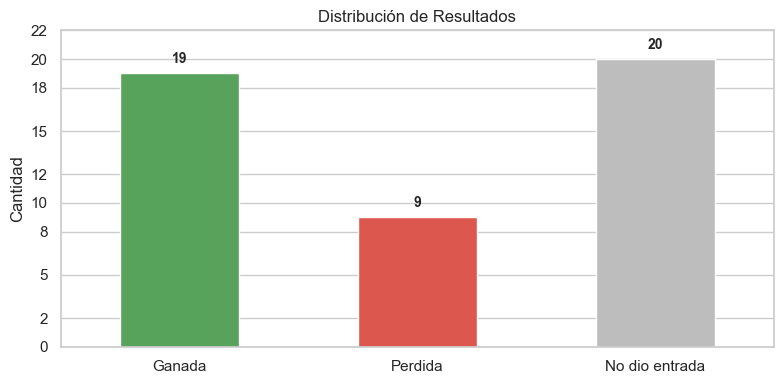

In [71]:
# Gráfico de distribución de resultados
# Colores personalizados
colores = {
    "Ganada": "#4CAF50",         # Verde
    "Perdida": "#F44336",        # Rojo
    "No dio entrada": "#BDBDBD"  # Gris
}

# Lista de colores en el orden de las categorías
colores_lista = [colores["Ganada"], colores["Perdida"], colores["No dio entrada"]]

# Gráfico
plt.figure(figsize=(8, 4))
ax = sns.countplot(
    data=df,
    x="Resultado",
    order=["Ganada", "Perdida", "No dio entrada"],
    width=0.5,
    hue="Resultado",
    dodge=False,
    palette=colores_lista  # Usamos la lista de colores en orden
)

y_ticks = [round(tick) for tick in ax.get_yticks()]
ax.set_yticks(y_ticks)

# Agregar etiquetas con los valores exactos arriba de cada barra
for bar in ax.patches:
    height = bar.get_height()
    if height > 0:
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height + 0.5,  # posición ligeramente arriba de la barra
            f"{int(height)}",  # sin decimales
            ha="center",
            va="bottom",
            fontsize=10,
            fontweight="bold"
        )

plt.title("Distribución de Resultados")
plt.xlabel("")
plt.ylabel("Cantidad")
plt.tight_layout()
plt.show()

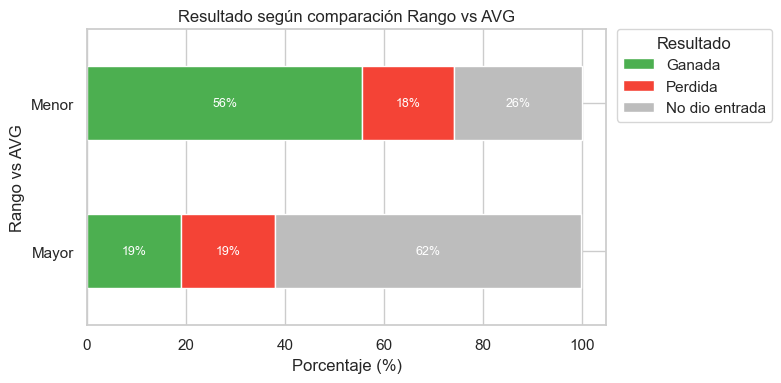

In [72]:
# Tabla de porcentaje por fila (comparación)
tabla = (pd.crosstab(df["Rango vs Avg"], df["Resultado"], normalize="index") * 100).round(1)

# Asegurar orden de columnas
tabla = tabla[["Ganada", "Perdida", "No dio entrada"]]

# Colores personalizados
colores = {
    "Ganada": "#4CAF50",
    "Perdida": "#F44336",
    "No dio entrada": "#BDBDBD"
}

# Gráfico apilado horizontal
ax = tabla.plot(kind="barh", stacked=True, figsize=(8, 4), color=[colores[col] for col in tabla.columns])
plt.title("Resultado según comparación Rango vs AVG")
plt.xlabel("Porcentaje (%)")
plt.ylabel("Rango vs AVG")
# Mover la leyenda arriba y centrada, sin que se superponga
plt.legend(
    title="Resultado",
    bbox_to_anchor=(1.02, 1),  # posición justo a la derecha
    loc='upper left',
    borderaxespad=0,
    frameon=True
)

# Añadir porcentajes en las barras
for i, fila in enumerate(tabla.values):
    x_offset = 0
    for j, valor in enumerate(fila):
        if valor > 5:  # solo mostrar si es mayor a 5% para evitar solapamientos
            plt.text(x_offset + valor / 2, i, f"{valor:.0f}%", ha="center", va="center", color="white", fontsize=9)
        x_offset += valor

plt.tight_layout()
plt.show()


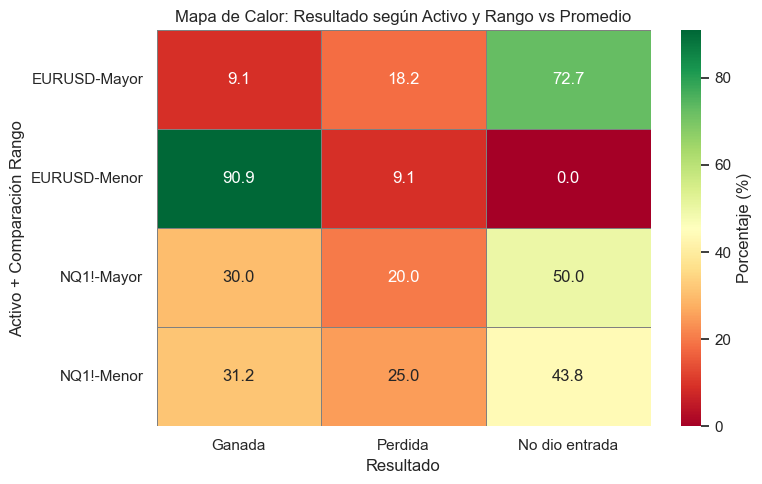

In [73]:
# Crear tabla cruzada de % por activo y comparación
tabla = pd.crosstab(
    index=[df["activo"], df["Rango vs Avg"]],
    columns=df["Resultado"],
    normalize='index'  # % por fila
) * 100

# Reordenar columnas para mantener lógica deseada
tabla = tabla[["Ganada", "Perdida", "No dio entrada"]]

# Colormap personalizado rojo -> naranja -> verde
cmap = sns.color_palette("RdYlGn", as_cmap=True)

# Graficamos
plt.figure(figsize=(8, 5))
sns.heatmap(
    tabla,
    annot=True,
    fmt=".1f",
    cmap=cmap,
    cbar_kws={"label": "Porcentaje (%)"},
    linewidths=0.5,
    linecolor='gray'
)

plt.title("Mapa de Calor: Resultado según Activo y Rango vs Promedio")
plt.xlabel("Resultado")
plt.ylabel("Activo + Comparación Rango")
plt.tight_layout()
plt.show()

## 📌 Conclusiones del análisis

Este análisis buscó determinar si la comparación entre el **rango de la sesión asiática** y el **promedio de los últimos 5 días (AVG)** influye significativamente en el resultado de una operación basada en la estrategia ICT/Smart Money.

### 🎯 Resultados clave:

| Rango vs Promedio | Ganadas | Perdidas | No dio entrada | Total | 
|--------------------|---------|----------|----------------|--------|
| Mayor              | 4       | 4        | 13             | 21     |
| Menor              | 15      | 5        | 7              | 27     |

### 🧠 Interpretación general:

- Cuando el rango es **menor que el promedio**, se observan **más oportunidades válidas y mayor tasa de aciertos** (56% de ganadas).
- Cuando el rango es **mayor**, **la mayoría de los casos terminan en "No dio entrada"** (62%), lo que sugiere menor claridad o estructura desfavorable para la estrategia.

### 🔥 Análisis por activo (mapa de calor):

El mapa de calor comparó la distribución de resultados entre los activos **EUR/USD** y **NQ1!**, separados según si el rango fue mayor o menor al promedio.

- Para **EUR/USD**:
  - Cuando el rango es **menor**, se observó una **altísima probabilidad de éxito (90.9%)** y **ningún caso sin entrada**.
  - Cuando el rango es **mayor**, el 72,7% de las veces **no dio entrada**, y solo el 9,1% fue ganadora.

- Para **NQ1!**:
  - El patrón es **menos marcado**, pero consistente: con rango menor se gana un poco más (31.2% vs. 30.0%) y se reduce la probabilidad de que no haya entrada (43.8% vs. 50%).

📌 Esto confirma que **el criterio de “rango menor que el promedio” tiene valor predictivo** y puede ser utilizado como filtro temprano en la toma de decisiones, especialmente con EUR/USD donde el impacto es más fuerte.

---

### ✅ Conclusión operativa:

> **La amplitud del rango respecto al promedio de 5 sesiones es una condición útil para filtrar días operables.**
> 
> Se sugiere priorizar días en los que el rango asiático es inferior al promedio reciente, ya que presentan mejores condiciones para la formación de setups estructurados (reingreso, cambio de estructura, confirmación EMA).

---

### 🛠️ Próximos pasos sugeridos:

- Automatizar esta condición como parte de tu checklist o dashboard diario.
- Evaluar si esta lógica se mantiene al cruzarla con otros filtros (ej. horario de entrada, día de la semana, tipo de activo).
- Evaluar la robustez del criterio de "rango < promedio" como filtro de calidad del día, aplicado individualmente a NQ1! y EUR/USD.
